In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [240]:
# prepare pairs of random variables to estimate the mutual information
num_samples = 10000
x = np.random.normal(loc = 0, scale = 1, size = num_samples)
y = x + np.random.normal(loc = 0, scale = 0.9, size = num_samples)

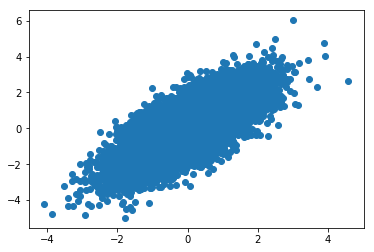

In [241]:
plt.scatter(x, y)
plt.show()

In [243]:
# prepare the statistical network
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam, SGD
import keras.backend as K

In [244]:
def build_MINE(inputs):
    lay = Dense(20, activation = "relu")(inputs)
    lay = Dense(20, activation = "relu")(lay)
    outputs = Dense(1, activation = "linear")(lay)
    
    MINE_network = Model(inputs = [inputs], outputs = [outputs])
    return MINE_network

In [245]:
batch_size = 10000

In [246]:
MINE_input = Input(shape = (2,), name = 'MINE_input')

In [247]:
MINE_network = build_MINE(MINE_input)

In [248]:
MINE_opt = Adam(lr = 0.01, beta_1 = 0.4, beta_2 = 0.6, epsilon = K.epsilon(), decay = 0.1)
#MINE_opt = SGD(lr = 0.1, momentum = 1e-6, decay = 1e-6)

In [249]:
def MINE_loss(y_true, y_pred):
    T_xy = y_pred[:batch_size,:]
    T_x_y = y_pred[batch_size:,:]
    loss = K.mean(T_xy, axis = 0) - K.log(K.mean(K.exp(T_x_y), axis = 0))
    return -loss

In [250]:
MINE_network.compile(loss = MINE_loss, optimizer = MINE_opt, metrics = [])

In [251]:
num_batches = 100

In [252]:
loss_curve = []

for i in range(num_batches):
    inds = np.random.choice(len(x), batch_size)
    batch_x = x[inds]
    batch_y = y[inds]
    batch_y_shuffled = y[inds]
    np.random.shuffle(batch_y_shuffled)
    
    batch_data_xy = np.stack([batch_x, batch_y], axis = 1)
    batch_data_x_y = np.stack([batch_x, batch_y_shuffled], axis = 1)

    batch_data = np.concatenate((batch_data_xy, batch_data_x_y), axis = 0)
    target = np.zeros((2 * batch_size, 1))
    loss = MINE_network.train_on_batch(batch_data, target)
    
    loss_curve.append(-loss)

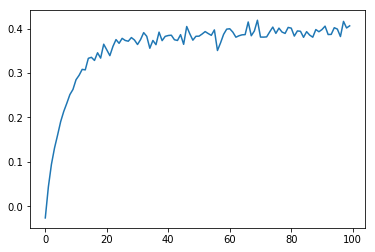

In [253]:
plt.plot(loss_curve)
plt.show()

In [238]:
import mutual_info

In [242]:
mutual_info.mutual_information((np.expand_dims(x, axis = 1), np.expand_dims(y, axis = 1)), k = 50)

0.40984727933564